## Introduction

Le traitement des séquences d'ADN comme un langage, connu sous le nom de comptage de k-mers, est une méthode efficace pour analyser les séquences génétiques. Cependant, cette méthode pose le défi de produire des vecteurs de longueur uniforme, nécessaires pour les algorithmes de classification ou de régression. Pour surmonter ce problème, des techniques comme la troncature des séquences ou le remplissage avec des caractères spécifiques sont utilisées.

En génomique, le comptage de k-mers consiste à compter les occurrences de chaque k-mer possible. Bien qu'il existe des outils spécialisés pour cette tâche, les outils de traitement du langage naturel en Python facilitent grandement ce processus.

## Importation des modules

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

## Importation des données

In [184]:
human_data = pd.read_table(r'../data/human_data.txt')
chimp_data = pd.read_table(r'../data/chimp_data.txt')
dog_data = pd.read_table(r'../data/dog_data.txt')

In [185]:
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [186]:
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [187]:
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


## Data processing

In [188]:
# Fonction pour convertir les chaînes de séquence en mots k-mers, taille par défaut = 6 (mots hexamères)
def getKmers(sequence, size = 6):
    return [sequence[x:x + size].lower() for x in range(len(sequence) - size + 1)]

In [189]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis = 1)
human_data = human_data.drop('sequence', axis = 1)

chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis = 1)
chimp_data = chimp_data.drop('sequence', axis = 1)

dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis = 1)
dog_data = dog_data.drop('sequence', axis = 1)

In [190]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [191]:
chimp_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [192]:
dog_data.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [193]:
# Création de la liste Human
human_texts = list(human_data['words'])

for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

y_data = human_data.iloc[:, 0].values
print(human_texts[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [194]:
# Création de la liste Chimp
chimp_texts = list(chimp_data['words'])

for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])

y_chimp = chimp_data.iloc[:, 0].values
print(chimp_texts[2])

atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgcgc cgcgct gcgctg cgctgg gctggt ctggtg tggtgg ggtggc gtggcg tggcgg ggcggt gcggtg cggtgg ggtggc gtggcg tggcga ggcgac gcgacg cgacgc gacgcg acgcgg cgcggc gcggct cggctg ggctgc gctgct ctgctc tgctcc gctcct ctcctg tcctgg cctgga ctggag tggagg ggaggc gaggcc aggccg ggccgg gccggc ccggcg cggcgg ggcggc gcggcg cggcgc ggcgcg gcgcgg cgcgga gcggag cggagc ggagct gagctc agctcc gctccg ctccgg tccggg ccgggc cgggcc gggccc ggcccg gcccgg cccggc ccggct cggctc ggctcc gctccc ctcccc tcccca ccccag cccagg ccaggc caggcc aggccg ggccgt gccgtg ccgtgc cgtgcg gtgcgg tgcggg gcggga cgggac gggacc ggaccg gaccgt accgtc ccgtcg cgtcgg gtcggg tcgggg cggggc ggggcc gggccg ggccga gccgag ccgagc cgagcg gagcgc agcgcc gcgccg cgccgc gccgct ccgctg cgctgc gctgcc ctgccg tgccga gccgac ccgacg cgacgt gacgtc acgtcc cgtccg gtccgc tccgcg ccgcgc cgcgcg gcgcgc cgcgca gcgcag cgcagg gcaggt caggtt aggttc ggttca gttcat ttcata tcatag catagg ataggc taggcg aggcgg ggcgga gcggaa cggaag ggaagg gaaggg aaggga agggac

In [195]:
# Création de la liste Dog
dog_texts = list(dog_data['words'])

for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])

y_dog = dog_data.iloc[:, 0].values  
print(dog_texts[2]) 

atggaa tggaaa ggaaac gaaaca aaacac aacacc acaccc caccct accctt cccttc ccttct cttcta ttctac tctacg ctacgg tacggc acggcg cggcga ggcgat gcgatg cgatga gatgag atgagg tgaggc gaggcg aggcgc ggcgct gcgctg cgctga gctgag ctgagc tgagcg gagcgg agcggc gcggcc cggcct ggcctg gcctgg cctggg ctgggc tgggcg gggcgg ggcggc gcggcg cggcgg ggcggc gcggcg cggcgt ggcgtc gcgtca cgtcag gtcagt tcagta cagtag agtagc gtagca tagcag agcagt gcagtg cagtgg agtggc gtggcg tggcgg ggcggc gcggcg cggcgg ggcggt gcggtg cggtgg ggtggt gtggta tggtag ggtagc gtagct tagctt agcttc gcttcg cttcgc ttcgcg tcgcgt cgcgtc gcgtcc cgtccc gtcccc tccccg ccccgg cccggg ccgggt cgggtc gggtcg ggtcgc gtcgcc tcgcct cgcctg gcctgt cctgtt ctgttt tgtttc gtttcc tttccc ttcccg tcccgg cccggg ccgggg cggggc ggggcg gggcgc ggcgcc gcgccc cgcccc gccccc cccccg ccccga cccgac ccgacg cgacgg gacggc acggcg cggcgg ggcggc gcggcg cggcga ggcgac gcgact cgactg gactgg actggc ctggca tggcag ggcagc gcagca cagcat agcatg gcatga catgat atgatg tgatga gatgaa atgaag tgaaga gaagaa aagaaa agaaag

In [196]:
# Transformation des éléments en texte
cv = CountVectorizer(ngram_range = (4, 4))

X_human = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

# Vérification des dimensions
print(X_human.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


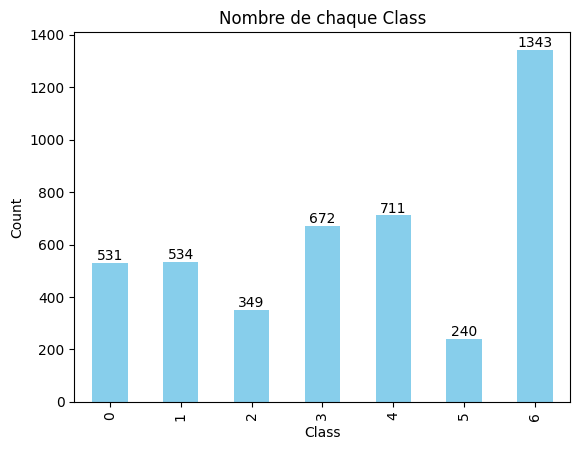

In [197]:
# Visualisation rapide du nombre de chaque classe
counts = human_data['class'].value_counts().sort_index()

fig, ax = plt.subplots()
counts.plot(kind = 'bar', ax = ax, color = 'skyblue')

for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha = 'center', va = 'bottom')

ax.set_title('Nombre de chaque Class')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.show()

## Entrainement et optimisation du modèle

In [198]:
# Création des ensembles d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X_human, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [199]:
# Réalisation d'un GridSearch pour trouver le meilleur alpha
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(estimator = MultinomialNB(), param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

print("Meilleur hyperparamètre trouvé : ", grid_search.best_params_)
print("Meilleure précision via la validation croisée : {:.2f}".format(grid_search.best_score_))

Meilleur hyperparamètre trouvé :  {'alpha': 1}
Meilleure précision via la validation croisée : 0.96


In [200]:
# Le paramètre alpha est issu du GridSearch précédent
classifier = MultinomialNB(alpha = 1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [201]:
# Estimation des prédictions
y_pred = classifier.predict(X_test)

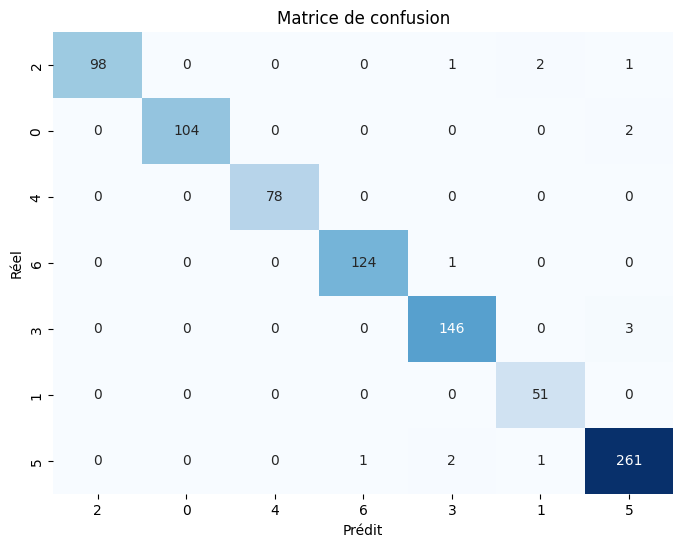

accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [202]:
# Calcul la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=pd.Series(y_test).unique(), columns=pd.Series(y_test).unique())

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix_df, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title('Matrice de confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

# Afficher les métriques
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))
